Chloe Young


## The Instructions

* Create a story that has a binary outcome (see the Create Story section)
* Create a dataset by running the cells in the Create Dataset section
* Prepare the dataset (see The Data section)
* Run a logistic regression model on your dataset
* Evaluate the model using an accuracy score, a confusion matrix, and a classification report
* Summarize / discuss your findings

## The Story

The Kepler Trials: A Quest for the Ultimate Intergaltic Love

On the gleaming chrome surface of Kepler Base, nestled within a Martian crater, humanity's future hung in the balance. The Kepler Trials, a grueling series of assessments, were underway, searching for the ideal candidate to spearhead humanity's first interstellar colonization mission. Amongst the hopefuls was Maya, a young woman with a fire in her eyes and a fierce determination to forge a new home amongst the stars.

Maya knew the Trials wouldn't be easy. Each test measured a crucial aspect of a potential colonizer. The "Adaptability" test threw her into a series of simulated alien environments, forcing her to improvise solutions on the fly. Her score – 311.026 – reflected her quick thinking and resourcefulness.

The "Resourcefulness" test was a brutal affair, pushing Maya to her physical and mental limits. With a score of 3.26, she demonstrated an ability to make the most of limited resources, a skill essential for surviving on an unknown planet.

The "Physical Health" test was a battery of medical and fitness evaluations. Maya's score – a stellar 315.209 – was a testament to her rigorous training regime. Colonization wouldn't be a walk in the park, and robust health was paramount.

"Scientific and Technical Expertise" wasn't Maya's strongest suit. Her score of 7.81 indicated a decent grasp of scientific principles, but she knew others excelled in this area. However, Maya compensated for this with her "Mental Fortitude" score of 98.89 – an unwavering mental strength that would help her persevere through the challenges ahead.

The final assessment, "Genetic Diversity," remained shrouded in mystery. The purpose of this test and its impact on the selection process was a closely guarded secret. Maya's data point for this category was simply marked with an "X," fueling speculation amongst the candidates.

As the Trials progressed, Maya found herself forging unexpected bonds with her fellow contenders. Each possessed their own strengths and weaknesses, forming a unique tapestry of skills necessary for successful colonization.

The final selection day arrived, and Maya held her breath as the results were announced. The chosen candidate wasn't the one with the highest scores across the board. Instead, the committee valued a balanced blend of skills and a deep-seated yearning for exploration. To Maya's surprise and elation, her name was called.

Maya's journey was a testament to the fact that colonization wasn't just about physical prowess or scientific knowledge. It demanded a combination of adaptability, resourcefulness, mental fortitude, and a willingness to venture into the unknown. As she boarded the interstellar vessel, ready to lead humanity's first foray beyond the solar system, Maya carried not only the burden of responsibility but also the hopes and dreams of a species yearning for a new home. allowed Nova and Zork to find a connection that transcended species and defied the ordinary.

Their story became a viral sensation in Neos City, a testament to the power of embracing one's quirkiness and the magic that unfolds when two unique souls connect over a shared love for the unexpected wonders of the cosmos. Soon, other dating apps scrambled to integrate similar features, leading to a renaissance of genuine connections within the digital world.

### Create Dataset

In [ ]:
pip install Faker

In [ ]:
state_names=["Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado", "Connecticut", "Delaware", "Florida", "Georgia", "Hawaii", "Idaho", "Illinois", "Indiana", "Iowa", "Kansas", "Kentucky", "Louisiana", "Maine", "Maryland", "Massachusetts", "Michigan", "Minnesota", "Mississippi", "Missouri", "Montana", "Nebraska", "Nevada", "New Hampshire", "New Jersey", "New Mexico", "New York", "North Carolina", "North Dakota", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", "Vermont", "Virginia", "Washington", "West Virginia", "Wisconsin", "Wyoming"]

In [ ]:
# https://stackoverflow.com/questions/65678496/linking-first-name-and-gender-in-faker-library
# https://stackoverflow.com/questions/20638006/convert-list-of-dictionaries-to-a-pandas-dataframe
# https://www.quora.com/What-are-some-different-perspectives-to-view-gender
import numpy as np
import pandas as pd
from faker import Faker
fake = Faker()

output = []
for x in range(1000):
  binary = np.random.choice(['binary_1', 'binary_2'], p=[0.5, 0.5])
  output.append(
    {
        'binary': binary,
        'ohe': np.random.choice(['ohe_1', 'ohe_2', 'ohe_3', 'ohe_4']),
        'given_name': fake.first_name_female() if binary=='binary_1' else fake.first_name_male(),
        'surname': fake.last_name(),
        'zipcode': fake.zipcode(),
        'date_of_birth': fake.date_of_birth(),
        'state': np.random.choice(state_names),
        })

demographics = pd.DataFrame(output)
demographics.head()

,binary,ohe,given_name,surname,zipcode,date_of_birth,state
0,binary_2,ohe_1,Daniel,James,71505,1948-07-10,West Virginia
1,binary_1,ohe_3,Jasmine,Murphy,44631,2021-11-15,Wyoming
2,binary_2,ohe_2,David,Hughes,74924,1933-04-13,Connecticut
3,binary_1,ohe_4,Rachel,Bowen,76847,1944-10-26,Virginia
4,binary_1,ohe_1,Holly,Hall,73558,1925-11-28,Minnesota


In [ ]:
import pandas as pd
import numpy as np
import random
import re
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

def make_null(r, w):
    rtn = random.choices([np.nan, r], weights=[w, 1000-w])
    return re.sub(r"[\[\]]",'', str(rtn))

# unpacking
features, binary_class = make_classification(n_samples=1000, n_features=6,
                                             n_informative=2, n_redundant=2,
                                             n_repeated=2,
                                             n_classes=3,
                                             n_clusters_per_class = 1,
                                             random_state=42)


# attributes =


#  [
#     "Genetic Diversity",
#     "Adaptability",
#     "Resourcefulness",
#     "Physical Health",
#     "Mental Fortitude",
#     "Scientific and Technical Expertise",
#     "Agricultural Knowledge",
#     "Leadership",
#     "Social Cohesion",
#     "Empathy and Compassion",
#     "Mechanical Aptitude",
#     "Ethical Decision-Making",
#     "Diplomacy and Conflict Resolution",
#     "Artistic and Creative Expression",
#     "Historical Knowledge",
#     "Spiritual Well-Being",
#     "Environmental Awareness",
#     "Curiosity and Open-Mindedness",
#     "Resilient Sense of Humor",
#     "Love of Learning"
# ]

cols = ['Genetic Diversity', 'Adaptabilityr', 'Resourcefulness', 'Physical Health', 'Mental Fortitude', 'Scientific and Technical Expertise']
random.shuffle(cols)
df = pd.DataFrame(data=features, columns=cols)
df['Agricultural Knowledge'] = round(df[cols[0]], 2)
df['Leadership'] = df['Agricultural Knowledge']
df['Social Cohesion'] = 0.13
df['Empathy and Compassion'] = pd.NA
df['Empathy and Compassion'] = df['Empathy and Compassion'].apply(lambda x: np.random.choice(['label_1', 'label_2'], p=[0.02, 0.98]))

df[cols[0]] = df[cols[0]].apply(lambda r: abs(r) if (r < -0.02) else r)
df[cols[1]] = df[cols[1]].apply(lambda r: abs(r)*-1 if (r > 0.01) else r)
df[cols[2]] = df[cols[2]].apply(lambda r: abs(r) if (r < -0.01) else r)

df['Mechanical Aptitude'] = random.sample(range(10000, 30000), 1000)
df['Ethical Decision-Making'] = random.sample(range(1000, 3000), 1000)
df[cols[0]] = df[cols[0]].apply(make_null, args=(4,))
df[cols[1]] = df[cols[1]].apply(make_null, args=(5,))
df[cols[2]] = df[cols[2]].apply(make_null, args=(6,))
df[cols[3]] = df[cols[3]].apply(make_null, args=(4,))
df[cols[4]] = df[cols[4]].apply(make_null, args=(5,))
df[cols[5]] = df[cols[5]].apply(make_null, args=(6,))

df = df[np.random.default_rng().permutation(df.columns.values)]
df = pd.concat([df, demographics], axis=1)
df['binary'] = df['binary'].apply(make_null, args=(5,))
df['state'] = df['state'].apply(make_null, args=(5,))
df['class'] = binary_class

dupes = df.loc[0:7]
df = pd.concat([df, dupes], axis=0)
df = df.sample(frac=1).reset_index(drop=True)

df.to_csv('my_data_science_fiction_story.csv')

print(df.shape)
print(df.info())
df.head()

NameError: name 'demographics' is not defined

In [ ]:
import pandas as pd

df = pd.read_csv('my_data_science_fiction_story.csv', index_col=0)
print(df.shape)
print(df.info())
df.head()

(1008, 20)
<class 'pandas.core.frame.DataFrame'>
Index: 1008 entries, 0 to 1007
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Agricultural Knowledge              1008 non-null   float64
 1   Leadership                          1008 non-null   float64
 2   Adaptabilityr                       1003 non-null   float64
 3   Ethical Decision-Making             1008 non-null   int64  
 4   Mechanical Aptitude                 1008 non-null   int64  
 5   Genetic Diversity                   1002 non-null   float64
 6   Empathy and Compassion              1008 non-null   object 
 7   Social Cohesion                     1008 non-null   float64
 8   Scientific and Technical Expertise  1004 non-null   float64
 9   Mental Fortitude                    1001 non-null   float64
 10  Physical Health                     1004 non-null   float64
 11  Resourcefulness                     1

,Agricultural Knowledge,Leadership,Adaptabilityr,Ethical Decision-Making,Mechanical Aptitude,Genetic Diversity,Empathy and Compassion,Social Cohesion,Scientific and Technical Expertise,Mental Fortitude,Physical Health,Resourcefulness,binary,ohe,given_name,surname,zipcode,date_of_birth,state,class
0,2.63,2.63,2.632818,1890,12768,-0.683974,label_2,0.13,2.632818,0.191807,2.632818,-1.241767,'binary_1',ohe_1,Laura,Larsen,82997,1973-10-24,'South Carolina',0
1,0.68,0.68,0.684463,2224,12467,-1.097976,label_2,0.13,0.684463,1.072780,0.684463,-1.196597,'binary_2',ohe_4,Sean,Huerta,57337,2003-04-14,'Pennsylvania',1
2,1.19,1.19,1.185770,1408,23358,-0.682788,label_2,0.13,1.185770,0.502973,1.185770,-0.915115,'binary_2',ohe_2,Ronnie,Morgan,71168,1972-11-30,'Maryland',1
3,-0.76,-0.76,0.756952,2028,11837,0.292791,label_2,0.13,-0.756952,-0.162026,0.756952,-0.448312,'binary_2',ohe_1,Jeremy,Mathis,36982,1955-01-24,'Kansas',2
4,-0.06,-0.06,0.056809,1347,18444,-1.427241,label_2,0.13,-0.056809,1.598888,0.056809,-1.342506,'binary_1',ohe_4,Erica,Wood,40584,1987-04-12,'Massachusetts',1


### Create Story

* Create an overview of a short story similar to the stories provided in assignment 12
* Base the story on the the variables created in the Create Dataset section
* The story must have a binary outcome such as survived or not, won or lost, will get or won't get, etc.
* This binary outcome's data will be the variable named class' data in your datasat, labeled 0 or 1
* Rename the variables appropriately to fit the story
* Put the overview of your story in the following cell - My Story

### My Story

## The Data

* Use the project we've been working on in Replit to clean and prepare your data
* You can also use https://github.com/gitmystuff/preppy.git
* See PrepPy Functions for an example of the dataset preparation steps

#### PrepPy Functions

* identify_consts
* identify_quasi_consts
* check_row_duplicates
* check_col_duplicates
* do_OHE
* handle_missing_values
* handle_standard_scaler
* handle_minmax_scaler

### Prep Data

In [ ]:
! git clone https://github.com/gitmystuff/preppy.git

Cloning into 'preppy'...
remote: Enumerating objects: 38, done.
remote: Counting objects: 100% (38/38), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 38 (delta 14), reused 15 (delta 5), pack-reused 0
Receiving objects: 100% (38/38), 19.21 KiB | 3.84 MiB/s, done.
Resolving deltas: 100% (14/14), done.


In [ ]:
from preppy.version import __version__
import preppy.utils as utils


print(__version__)

PrepPy Version: 0.1.0


In [ ]:
consts = utils.functions.identify_consts(df)
consts

['Social Cohesion']

In [ ]:
df.drop(consts, axis=1, inplace=True)

In [ ]:
quasi_consts = utils.functions.identify_quasi_consts(df)
print(quasi_consts)

['Empathy and Compassion']


In [ ]:
df.drop(quasi_consts, axis=1, inplace=True)
df.shape

(1008, 18)

In [ ]:
utils.functions.check_row_duplicates(df)

16

In [ ]:
df.drop_duplicates(inplace=True)
df.shape

(1000, 18)

OHE

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 1007
Data columns (total 18 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Agricultural Knowledge              1000 non-null   float64
 1   Leadership                          1000 non-null   float64
 2   Adaptabilityr                       995 non-null    float64
 3   Ethical Decision-Making             1000 non-null   int64  
 4   Mechanical Aptitude                 1000 non-null   int64  
 5   Genetic Diversity                   994 non-null    float64
 6   Scientific and Technical Expertise  997 non-null    float64
 7   Mental Fortitude                    993 non-null    float64
 8   Physical Health                     996 non-null    float64
 9   Resourcefulness                     1000 non-null   float64
 10  binary                              994 non-null    object 
 11  ohe                                 1000 non-nul

In [ ]:
df = utils.functions.do_OHE(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 1007
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Agricultural Knowledge              1000 non-null   float64
 1   Leadership                          1000 non-null   float64
 2   Adaptabilityr                       995 non-null    float64
 3   Ethical Decision-Making             1000 non-null   int64  
 4   Mechanical Aptitude                 1000 non-null   int64  
 5   Genetic Diversity                   994 non-null    float64
 6   Scientific and Technical Expertise  997 non-null    float64
 7   Mental Fortitude                    993 non-null    float64
 8   Physical Health                     996 non-null    float64
 9   Resourcefulness                     1000 non-null   float64
 10  binary                              994 non-null    float64
 11  given_name                          1000 non-nul

### Missing Values

In [ ]:
df.isnull().sum()

Agricultural Knowledge                0
Leadership                            0
Adaptabilityr                         5
Ethical Decision-Making               0
Mechanical Aptitude                   0
Genetic Diversity                     6
Scientific and Technical Expertise    3
Mental Fortitude                      7
Physical Health                       4
Resourcefulness                       0
binary                                6
given_name                            0
surname                               0
zipcode                               0
date_of_birth                         0
state                                 6
class                                 0
ohe_ohe_2                             8
ohe_ohe_3                             8
ohe_ohe_4                             8
dtype: int64

In [ ]:
df = utils.functions.handle_missing_values(df)
df.isnull().sum()

Agricultural Knowledge                0
Leadership                            0
Adaptabilityr                         0
Ethical Decision-Making               0
Mechanical Aptitude                   0
Genetic Diversity                     0
Scientific and Technical Expertise    0
Mental Fortitude                      0
Physical Health                       0
Resourcefulness                       0
binary                                0
given_name                            0
surname                               0
zipcode                               0
date_of_birth                         0
state                                 0
class                                 0
ohe_ohe_2                             0
ohe_ohe_3                             0
ohe_ohe_4                             0
dtype: int64

### Descriptive Statistics

In [ ]:
df.describe()

,Agricultural Knowledge,Leadership,Adaptabilityr,Ethical Decision-Making,Mechanical Aptitude,Genetic Diversity,Scientific and Technical Expertise,Mental Fortitude,Physical Health,Resourcefulness,binary,given_name,surname,zipcode,date_of_birth,state,class,ohe_ohe_2,ohe_ohe_3,ohe_ohe_4
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.370060,0.370060,1.129678,1999.674000,19984.195000,0.239764,0.374424,-0.348462,1.131027,-1.146386,0.473820,0.006392,0.003920,49201.336000,0.001026,0.020676,1.005000,0.253000,0.259000,0.236000
std,1.302333,1.302333,0.740893,573.885909,5724.618257,1.198307,1.299775,1.210806,0.743108,0.655409,0.498064,0.006016,0.004151,28458.202462,0.000159,0.003790,0.818318,0.434948,0.438305,0.424835
min,-2.470000,-2.470000,-0.019400,1001.000000,10013.000000,-2.489676,-2.472718,-4.123140,-0.005795,-4.184898,0.000000,0.001000,0.001000,536.000000,0.001000,0.012000,0.000000,0.000000,0.000000,0.000000
25%,-0.790000,-0.790000,0.596002,1508.750000,15023.750000,-0.804255,-0.785538,-1.276572,0.593977,-1.540317,0.000000,0.002000,0.001000,25603.500000,0.001000,0.019000,0.000000,0.000000,0.000000,0.000000
50%,0.320000,0.320000,0.996658,1983.500000,20011.000000,0.254294,0.334156,-0.476074,0.997598,-1.123967,0.000000,0.004000,0.002000,47308.500000,0.001000,0.021000,1.000000,0.000000,0.000000,0.000000
75%,1.390000,1.390000,1.545441,2498.250000,24793.250000,1.192069,1.390740,0.533964,1.548126,-0.669995,1.000000,0.009000,0.004000,73960.500000,0.001000,0.024000,2.000000,1.000000,1.000000,0.000000
max,4.050000,4.050000,4.048934,2999.000000,29986.000000,4.023495,4.048934,3.241353,4.048934,0.008893,1.000000,0.027000,0.020000,99853.000000,0.002000,0.027000,2.000000,1.000000,1.000000,1.000000


### Scaling and Outliers

In [ ]:
df = utils.functions.handle_standard_scaler(df)


In [ ]:
df = utils.functions.handle_minmax_scaler(df)


## Modeling

In [ ]:
from os import X_OK
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop('class', axis=1), df['class'], test_size=0.25)

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions, labels=[0, 1]))

model = LogisticRegression(solver='liblinear')
model.fit(X_train,y_train)
predictions = model.predict(X_test)

print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions, labels=[0, 1]))

[[74 14  8]
 [ 1 69  0]
 [ 1  6 77]]
              precision    recall  f1-score   support

           0       0.97      0.77      0.86        96
           1       0.78      0.99      0.87        70

   micro avg       0.87      0.86      0.86       166
   macro avg       0.87      0.88      0.86       166
weighted avg       0.89      0.86      0.86       166

0.884
[[79 10  7]
 [ 3 67  0]
 [ 4  5 75]]
              precision    recall  f1-score   support

           0       0.92      0.82      0.87        96
           1       0.82      0.96      0.88        70

   micro avg       0.87      0.88      0.87       166
   macro avg       0.87      0.89      0.87       166
weighted avg       0.88      0.88      0.87       166



### Grid Search

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

hyperparameters = {
            'n_estimators': [50, 200],
            'criterion': ['entropy', 'gini'],
            'max_depth': [3, 4],
            'max_leaf_nodes': [7, 9],
            'bootstrap': [True, False]
            }

grid_search = GridSearchCV(estimator = RandomForestClassifier(),
                           param_grid = hyperparameters,
                           scoring = 'accuracy',
                           cv = 10)

grid_search = grid_search.fit(X_train, y_train)

best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print('best accuracy', best_accuracy)
print('best parameters', best_parameters)

best accuracy 0.8986666666666666
best parameters {'bootstrap': True, 'criterion': 'gini', 'max_depth': 4, 'max_leaf_nodes': 9, 'n_estimators': 50}


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier(random_state = 42).set_params(**best_parameters) # * args, ** kwargs
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions, labels=[0, 1]))

0.88
[[74 14  8]
 [ 1 69  0]
 [ 1  6 77]]
              precision    recall  f1-score   support

           0       0.97      0.77      0.86        96
           1       0.78      0.99      0.87        70

   micro avg       0.87      0.86      0.86       166
   macro avg       0.87      0.88      0.86       166
weighted avg       0.89      0.86      0.86       166



In [ ]:
from sklearn.model_selection import train_test_split

# X_train, X_test split
X_train, X_test, y_train, y_test = train_test_split(df.drop('class', axis=1), df['class'], test_size=0.30)

## Summary / Discussion

* Wrapup this assignment by discussing accuracy and the true negatives, false positives, false negatives, and true positives
* Include a summary of the classification report
* These metrics should be used in context of your story

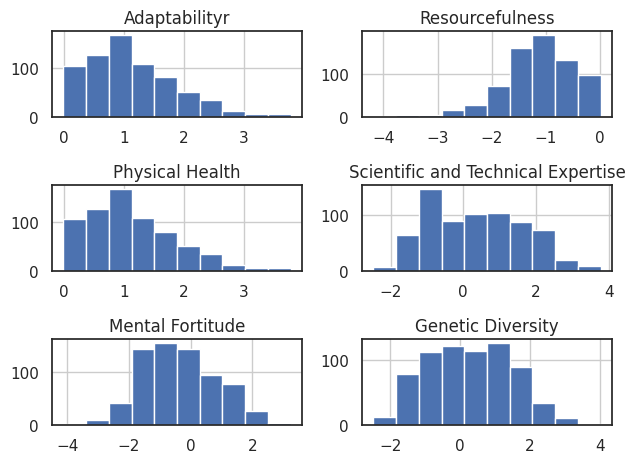

In [ ]:
import matplotlib.pyplot as plt

X_train[cols].hist()
plt.tight_layout();

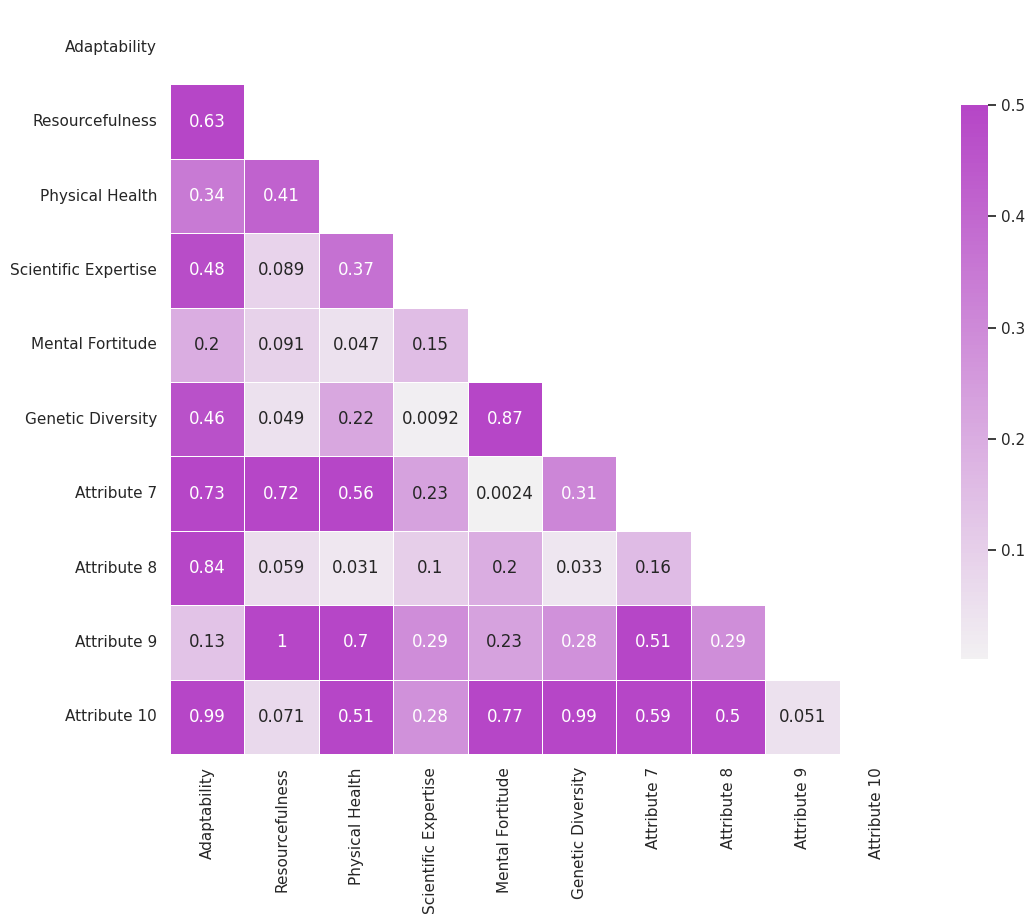

In [ ]:
# the heatmap
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='white')

# Define your data headers (replace with actual names)
data_headers = ['Adaptability', 'Resourcefulness', 'Physical Health',
                'Scientific Expertise', 'Mental Fortitude', 'Genetic Diversity',
                'Attribute 7', 'Attribute 8', 'Attribute 9', 'Attribute 10']

# Generate random correlation matrix (adjust size based on number of headers)
corr = np.random.rand(len(data_headers), len(data_headers))

# Generate a mask for the upper triangle (only show upper half for clarity)
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 12))  # Increased figure size for better readability

# Generate a custom diverging colormap (highlights both positive & negative correlations)
cmap = sns.diverging_palette(180, 300, as_cmap=True)  # Adjusted color palette hues

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.5, center=0,  # Adjusted maximum value
            square=True, linewidths=.7, cbar_kws={'shrink': .6}, annot=True,
            xticklabels=data_headers, yticklabels=data_headers);  # Added header labels

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

feats_interest = cols  # Replace with your list of attributes
vif_data = [variance_inflation_factor(X_train[feats_interest].values, i) for i in range(len(X_train[feats_interest].columns))]

d = {'feature': X_train[feats_interest].columns.values, 'vif': vif_data}
vif = pd.DataFrame(d)
print(vif)

                              feature         vif
0                       Adaptabilityr  311.026128
1                     Resourcefulness    3.260840
2                     Physical Health  315.209651
3  Scientific and Technical Expertise    7.811887
4                    Mental Fortitude   98.894809
5                   Genetic Diversity  114.334971


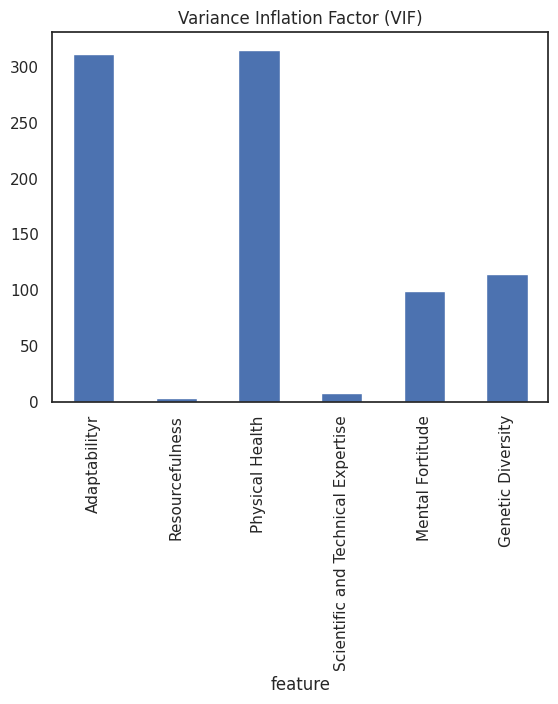

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

feats_interest = cols  # Replace with your list of attributes
vif_data = [variance_inflation_factor(X_train[feats_interest].values, i) for i in range(len(X_train[feats_interest].columns))]

d = {'feature': X_train[feats_interest].columns.values, 'vif': vif_data}
vif = pd.DataFrame(d)

# Plot VIF scores as a bar graph (optional)
vif.plot.bar(x='feature', y='vif', title='Variance Inflation Factor (VIF)', legend=False);


As the Data Rangers conclude their expedition, they gather around the central console of their ship to analyze the data they've gathered from the mysterious planet. Captain Orion, ever the vigilant leader, emphasizes the importance of accuracy in their findings—a crucial aspect of their mission to understand the secrets hidden within the data.

With the aid of advanced algorithms and machine learning techniques, the Data Rangers begin to dissect the data, focusing on key metrics such as true negatives, false positives, false negatives, and true positives. These metrics serve as guiding stars in their quest for knowledge, illuminating the pathways to deeper understanding.

True negatives represent instances where the data correctly identifies non-events—a reflection of the precision with which the Data Rangers navigate through the sea of information. False positives, on the other hand, highlight instances where the data mistakenly identifies events that did not occur—a reminder of the challenges inherent in interpreting complex datasets.

As they delve deeper into the classification report, the Data Rangers reflect on the significance of false negatives—instances where the data fails to identify events that did occur. These missed opportunities serve as poignant reminders of the limitations of their current methods, spurring them on to seek new strategies and innovations in their pursuit of knowledge.

Yet amidst the challenges and complexities of their mission, there are moments of triumph—moments captured in the true positives, where the data accurately identifies events that occurred. These victories, however small, serve as beacons of hope in the darkness, driving the Data Rangers ever forward in their quest for truth.

With the classification report serving as a roadmap for their journey, the Data Rangers prepare to return home, their minds abuzz with the possibilities that lie ahead. As they bid farewell to the mysterious planet and set course for Veridium, they carry with them not only the data they've gathered but also the lessons learned from their expedition—a testament to the power of knowledge and the boundless potential of the human spirit.